In [1]:
import numpy as np
import pandas as pd
import os,fnmatch

In [2]:
music="F:/Classification-of-heart/Dataset/set_a/"
import librosa
import IPython.display as ipd
print(music)
x,sr=librosa.load(music + "normal__201106141148.wav",duration=5)
ipd.Audio(x,rate=sr)

F:/Classification-of-heart/Dataset/set_a/


In [3]:
 def ses_df(music_folders,kolonlar,tür_liste):
    liste=[]
    adim=0
    for folder in music_folders:
        for tür in tür_liste:
            dosyalar=fnmatch.filter(os.listdir(folder),tür)
            label=tür.split("*")[0]
            for dosya in dosyalar:
                x,sr=librosa.load(folder+dosya,duration=5,res_type='kaiser_fast')
                liste.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                liste[adim].append(sum(librosa.zero_crossings(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_centroid(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                liste[adim].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                liste[adim].append(label)
                liste[adim].append(dosya)
                adim+=1
    return pd.DataFrame(liste,columns=kolonlar)

In [4]:
music_folders=["F:/Classification-of-heart/Dataset/set_a/","F:/Classification-of-heart/Dataset/set_b/"]


In [5]:
kolonlar=["mfkk"+str(i) for i in range(20)]
for isim in ["zero","centroid","rolloff","chroma","tür","dosya"]:
    kolonlar.append(isim)

In [6]:
tür_liste=["normal*.wav","artifact*.wav","murmur*.wav"]


In [7]:
music_df=ses_df(music_folders,kolonlar,tür_liste)

C:\Users\hp\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [8]:
print(music_df.shape)
music_df.head()

(520, 26)


,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma,tür,dosya
0,-504.037964,76.997124,-1.585262,34.563679,0.663375,23.808498,-3.102399,16.335905,-6.465252,11.320951,...,-9.759558,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670,normal,normal__201101070538.wav
1,-369.186737,91.602287,8.740098,45.028107,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158,normal,normal__201101151127.wav
2,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717894,0.050543,13.745317,-3.446706,18.079884,...,-11.210547,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878,normal,normal__201102081152.wav
3,-342.682220,133.837189,-11.243758,21.353348,-0.145609,29.179508,-5.019009,13.736671,-3.991349,15.423252,...,-1.418862,6.903130,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516,normal,normal__201102081321.wav
4,-549.604980,73.100739,-1.697143,28.962118,-0.544705,18.543926,-1.803225,15.123065,-6.083783,9.622066,...,-8.850922,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684,normal,normal__201102201230.wav


In [9]:
music_df["tür"].value_counts()

normal      351
murmur      129
artifact     40
Name: tür, dtype: int64

In [10]:
X=music_df.iloc[:,0:24]
X.head()

,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk14,mfkk15,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma
0,-504.037964,76.997124,-1.585262,34.563679,0.663375,23.808498,-3.102399,16.335905,-6.465252,11.320951,...,-9.941511,0.288859,-9.759558,-1.204180,-8.794813,-2.499642,22856,2543.690892,5384.696452,0.671670
1,-369.186737,91.602287,8.740098,45.028107,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,10.951164,7.448577,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158
2,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717894,0.050543,13.745317,-3.446706,18.079884,...,-7.436246,7.344612,-11.210547,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878
3,-342.682220,133.837189,-11.243758,21.353348,-0.145609,29.179508,-5.019009,13.736671,-3.991349,15.423252,...,0.412823,5.838561,-1.418862,6.903130,-1.007653,1.195708,7681,1503.253101,3166.028849,0.637516
4,-549.604980,73.100739,-1.697143,28.962118,-0.544705,18.543926,-1.803225,15.123065,-6.083783,9.622066,...,-10.037401,-0.315625,-8.850922,-0.998493,-7.304602,-1.575300,25069,2680.044197,5603.118896,0.677684


In [11]:
y=music_df["tür"]
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: tür, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(y)
y=le.transform(y)
y[10:40]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=30)
print("X Train: ",len(X_train),"\n","X Test: ",len(X_test),sep="")


X Train: 442
X Test: 78


In [14]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth= 8,
 max_features= 5,
 min_samples_split=5,
 n_estimators=500).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.9230769230769231

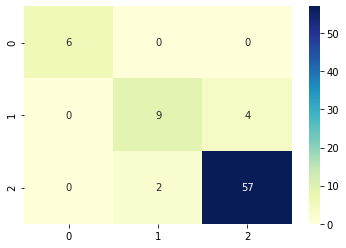

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
mlp=MLPClassifier().fit(X_train_scaled,y_train)
mlp

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [19]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8589743589743589

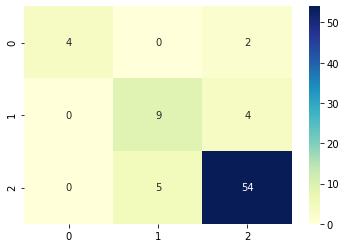

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [21]:
#from sklearn.externals import joblib
#joblib.dump(mlp, 'heartbeat.pkl')